# Fake news detection

In [1]:
import pandas as pd
import sweetviz as sv#EDA lib
import numpy as np
import seaborn as sns#visualization
import re#regular  expressions
import string
import nltk #NLP
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
stop=set(stopwords.words('english'))
import tensorflow as tf#ML
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow import keras
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VovAz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VovAz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VovAz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_fake = pd.read_csv('C:/Users/VovAz/OneDrive/Desktop/Проект/Fake news/fake.csv')# Read data
df_true = pd.read_csv('C:/Users/VovAz/OneDrive/Desktop/Проект/Fake news/true.csv')

df_true.info()
df_fake.info()
my_report = sv.analyze(df_true)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
my_report1 = sv.analyze(df_fake)
my_report1.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\VovAz\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### EDA shows us, that data contains some duplicates and there is no missing values.

In [3]:
df_fake.drop_duplicates(inplace = True)# drop duplicates
df_true.drop_duplicates(inplace = True)

In [4]:
df_fake['is_fake'] = 1 #creating new column with targets
df_true['is_fake'] = 0
df = pd.concat([df_true, df_fake], ignore_index = True) #concat two tables in one

<Axes: xlabel='is_fake', ylabel='count'>

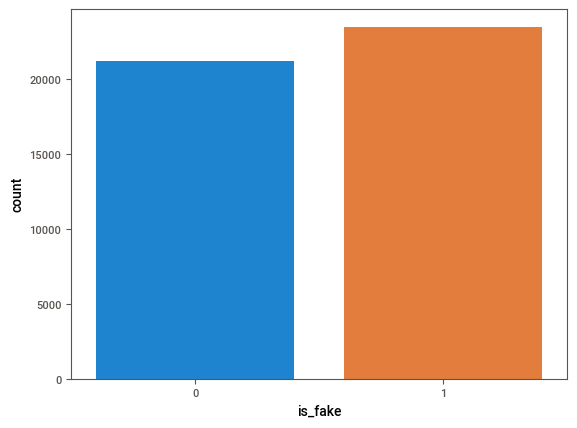

In [5]:
sns.countplot(x = df['is_fake'])

In [6]:
print(df['subject'][df['is_fake'] == 1].value_counts())
print('\n',df['subject'][df['is_fake'] == 0].value_counts())
#%%

News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

 politicsNews    11220
worldnews        9991
Name: subject, dtype: int64


### We observing, that data target is pretty balanced, but subject of news is not the same at fake and true news, so we can't use this infomation for fitting model

In [7]:
df['text'] = df['text'] + " " + df['title'] # merging title and text of news in one feature
print(df['text'].head())

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object


In [8]:
def clean_text(text):#function for cleaning text
    text=str(text).lower() #converts text to lowercase
    text=re.sub('\d+', '', text) #removes numbers
    text=re.sub('\[.*?\]', '', text) #removes HTML tags
    text=re.sub('https?://\S+|www\.\S+', '', text) #removes url
    text=re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", text) #removes emojis

    text = text.translate(str.maketrans('', '', string.punctuation))    #removes punctuations
    return text

In [9]:
df['clean_text'] = df['text'].apply(clean_text)

df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop)]))#removing stopwords
df['clean_text'].head()

0    washington reuters head conservative republica...
1    washington reuters transgender people allowed ...
2    washington reuters special counsel investigati...
3    washington reuters trump campaign adviser geor...
4    seattlewashington reuters president donald tru...
Name: clean_text, dtype: object

In [10]:
X=df['clean_text'] #feature
y=df['is_fake'].values #target
X_train1,X_valid,y_train1,y_valid=train_test_split(X,y,test_size= 0.2, random_state= 123456, shuffle=True) #using Shuffle after applying concat
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1,
                                                    test_size = 0.25, random_state = 123456, shuffle=True)
# splitting data on train,valid and test sets

In [11]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


### Due low perfomance i fitted model separatly 

In [12]:
model2 = keras.models.load_model('C:/Users/VovAz/OneDrive/Desktop/Проект/Fake news/model/')
model2.evaluate(X_test, y_test)

280/280 [==============================] - 2127s 8s/step - loss: 0.2168 - auc: 0.9740


[0.21681901812553406, 0.9739789962768555]

In [18]:
model2.predict(pd.Series('Supreme Court Skeptical of Biden’s Student Loan Cancellation PlanThe Biden administration wants to wipe out $400 billion in student debt, but the court’s conservative majority questioned its power to do so. Six Republican-dominated states — Nebraska, Missouri, Arkansas, Iowa, Kansas and South Carolina — and two individuals sued to stop the plan.'))

1/1 [==============================] - 0s 279ms/step


array([[0.11775495]], dtype=float32)

In [19]:
model2.predict(pd.Series('Fred Rogers wore his iconic sweaters to conceal the extensive tattoos on his arms that were acquired while serving in the military. '))

1/1 [==============================] - 0s 290ms/step


array([[0.99730694]], dtype=float32)

In [41]:
model2.predict(pd.Series('Pointing out that every armored vehicles they have received to date lacked signatures of basketball greats, Ukrainian President Volodymyr Zelensky requested Tuesday that the United States government send a tank autographed by Shaquille O’Neal. “While we appreciate the many Javelin anti-aircraft systems and artillery, none of them were signed by one of the best NBA centers of all time, the Big Shamrock himself,” said Zelensky, explaining that he and the rest of the nation were huge fans and an M1 Abrams tank with a signature in big letters across the vehicle’s side skirt or turret from the four-time NBA champion would really help the war effort and boost morale of the Ukrainian people. “We all grew up watching The Diesel and if we had a tank signed by Shaq, who dominated the court for 19 years, it would inspire us to dominate the Russians on the battlefield. Also, if the signed tank could also be transported in an acrylic protective case, that would be great.” At press time, Zelensky had posted the one-of-a-kind Shaquille O’Neal-signed tank on eBay.'))

1/1 [==============================] - 0s 306ms/step


array([[0.80633384]], dtype=float32)

In [40]:
model2.predict(pd.Series('The United States directly warned Tuesday that it would target Chinese firms or people involved in any effort to send lethal aid to Russia for its war in Ukraine, underscoring a fast-deepening showdown with its superpower rival.In the most specific public admonition on the issue to Beijing so far, US Secretary of State Antony Blinken underlined that arming Moscow’s forces would cause China serious problems around the world.“China can’t have it both ways when it comes to … the Russian aggression in Ukraine. It can’t be putting forward peace proposals on the one hand, while actually feeding the flames of the fire that Russia has started with the other hand,” Blinken said in Kazakhstan.US officials have spent the past 10 days warning that it has intelligence that China is considering sending lethal aid to Russia, causing fury in Beijing and underscoring how already deteriorating diplomatic relations are being rocked by almost daily crises – from a recent spy balloon controversy to a revived dispute over the specific origins of Covid-19. On Monday evening, the White House gave federal agencies a 30-day deadline to remove TikTok, which is owned by Chinese company ByteDance, from federal devices. And later Tuesday, a new House select committee will hold its first hearing on the fast-widening US-China rivalry.In his clearest comments about how the US would respond if China did decide to help its ally Russia with lethal aid, Blinken spoke of punishments for Chinese firms that could cause Beijing to pay an economic price.“We did very clearly warn China about the implications and consequences of going through with providing such support,” referring to his own meeting with top Chinese diplomat Wang Yi in Munich this month and President Joe Biden’s talks with President Xi Jinping in Indonesia in November 2022.'))

1/1 [==============================] - 0s 323ms/step


array([[0.02271237]], dtype=float32)

### Model is pretty good at detecting fake news, but training data usa-oriented, so it can't detect russian satiric news, for example

In [42]:
model2.predict(pd.Series('In Moscow, nationalists from several organizations united at once to help the Georgian diaspora rebuild a market not far from the Paveletskaya metro station. In 2017, it was the nationalist activists who smashed the malls in this place.The “reversal” of 180 degrees occurred after the so-called queer parade of drag users took place in Tbilisi. Its participants recited slogans in support of promiscuity, the multigender paradigm and drug use. Most of them were emigrants from Russia.“We have a lot of questions to each other and a lot of mutual claims with the Georgian diaspora, but now it’s not so important,” says Arkady Bonchenko, leader of the Russkaya Sloboda movement. – It turns out that the participants of this coven are our compatriots. It turns out that we are to blame before the Georgian people, who are now suffering from them. Forgive us for them."As a gesture of repentance, the nationalists decided to help rebuild the market, and the Moscow migration authorities, in turn, will be sympathetic to the Georgians, who now do not want to return to their country. Persons with Georgian citizenship whose period of permitted stay is expiring will be able to extend it many times until the situation in Tbilisi stabilizes.'))

1/1 [==============================] - 0s 268ms/step


array([[0.4284585]], dtype=float32)

In [44]:
model2.predict(pd.Series(clean_text('In Moscow, nationalists from several organizations united at once to help the Georgian diaspora rebuild a market not far from the Paveletskaya metro station. In 2017, it was the nationalist activists who smashed the malls in this place.The “reversal” of 180 degrees occurred after the so-called queer parade of drag users took place in Tbilisi. Its participants recited slogans in support of promiscuity, the multigender paradigm and drug use. Most of them were emigrants from Russia.“We have a lot of questions to each other and a lot of mutual claims with the Georgian diaspora, but now it’s not so important,” says Arkady Bonchenko, leader of the Russkaya Sloboda movement. – It turns out that the participants of this coven are our compatriots. It turns out that we are to blame before the Georgian people, who are now suffering from them. Forgive us for them."As a gesture of repentance, the nationalists decided to help rebuild the market, and the Moscow migration authorities, in turn, will be sympathetic to the Georgians, who now do not want to return to their country. Persons with Georgian citizenship whose period of permitted stay is expiring will be able to extend it many times until the situation in Tbilisi stabilizes.')))

1/1 [==============================] - 0s 264ms/step


array([[0.25701183]], dtype=float32)

### Cleaning text made it even worse